In [43]:
import persistence
import pandas as pd
from core import PositionState
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(24)

In [44]:
def load_data(experiment_dir: str, logger: str) -> list[dict]:
    data: list[dict] = []
    for log_file in persistence.list_files(experiment_dir, logger):
        data.append(persistence.load(experiment_dir, logger, log_file))
    return data

## PositionLogger

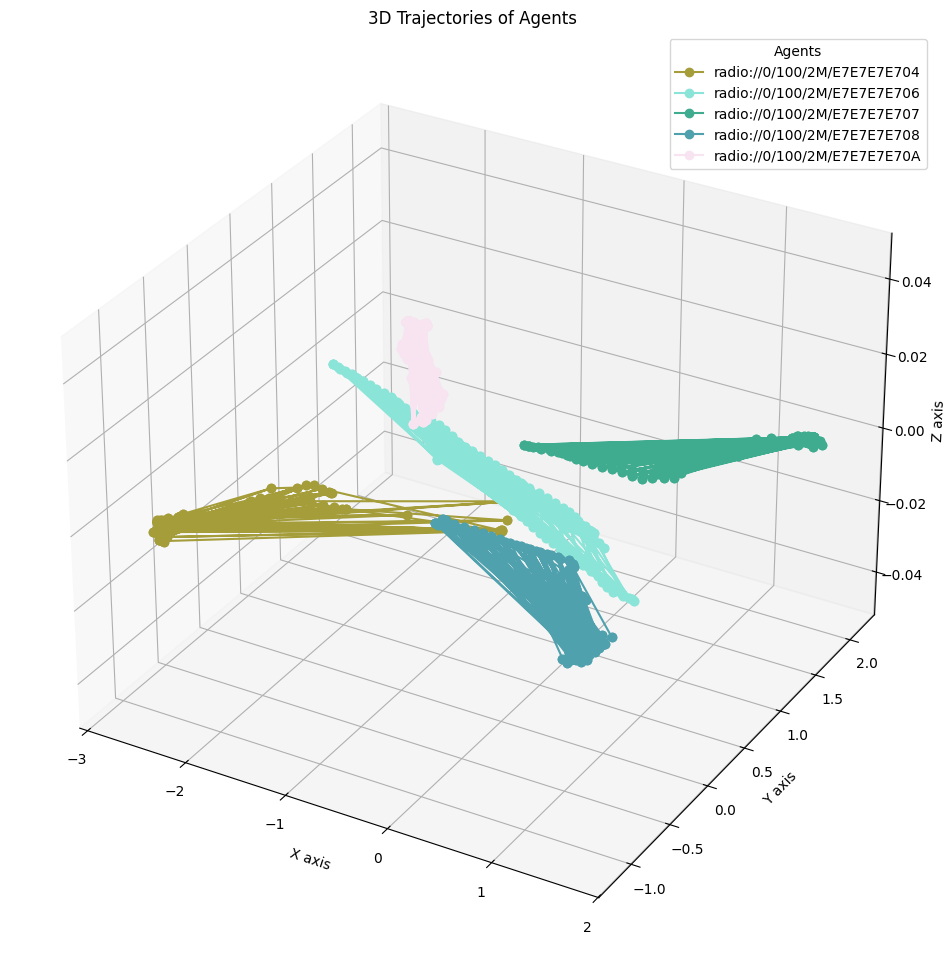

In [46]:
from numpy import ndarray


def plot_3d_trajectories(df: pd.DataFrame):
    assert set(df.columns) == {'agent', 'X', 'Y', 'Z'}, "Invalid df provided"

    fig = plt.figure(figsize=(24, 12))
    ax = fig.add_subplot(111, projection='3d')

    unique_agents: list[str] = df['agent'].unique()
    colors: dict[str, ndarray] = {agent: np.random.rand(3,) for agent in sorted(unique_agents, key=lambda x: unique_agents.tolist().index(x))}

    for agent, group in df.groupby('agent'):
        ax.plot(group['X'], group['Y'], group['Z'], marker='o', linestyle='-', color=colors[agent], label=agent)

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title('3D Trajectories of Agents')
    ax.legend(title='Agents')

    plt.show()


processed_data: list[dict] = []
for data_log in load_data('default_vu', 'PositionLogger'):
    state: PositionState = data_log['state']
    processed_data.append(
        {
            'agent': data_log['agent'],
            'X' : state.position.x,
            'Y' : state.position.y,
            'z' : state.position.z,
        }
    )

df: pd.DataFrame = pd.DataFrame(processed_data, columns=['agent', 'X', 'Y', 'Z']).fillna(0)
plot_3d_trajectories(df)